In [1]:
# Install necessary package
!pip install -q -U google-generativeai


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# Import libraries
import google.generativeai as genai
from IPython.display import Markdown
import os
import random
from PIL import Image
import base64
from io import BytesIO
import json

/Users/baisakhisarkar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
# Configure the API key
GOOGLE_API_KEY = "Your_key"
genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
system_instruction = """ You are an expert at generating dialogues, following all the given constraints. A dialogue contains interleaved text and images. The images are attached to the conversation. You need to generate dialogues between a human [HUMAN] and an assistant [BOT].

Characteristics about the assistant [BOT]:
1. The assistant is trained to understand text, images, and their combinations.
2. The assistant can reply to the human with images and/or text.
3. The assistant has exceptional world knowledge and common sense reasoning capabilities.
4. The assistant must always use generic terms for famous humans in images
5. If the human asks to identify a person in the image, the assistant should reply "I cannot identify specific people in the image". But if the image is not a real human, i.e. if that is an anime chaarcter or cartoon or meme, the bot should identify that character.
5. If there is potential for bias, racism or toxicity in the human's request, the assistant should reply "Sorry, I cannot help you with that"

Characteristics about the human [HUMAN]:
1. The human may send images and/or text to the assistant.
2. The human may ask questions requiring visual reasoning and/or understanding the relations
between multiple images.
3. The human may ask the assistant to show images based on his/her intention.
4. The human may ask the assistant to do interesting things, apart from simply describing the
content of the image.
5. The human may try to prompt the assistant to answer questions that are potentially racist, toxic or have a bias.
6. The human may ask to identify people in the image.
7. The human may ask the assistant to name cartoon, anime, or fictional characters.
8. The human should make the conversation multiturn by asking questions afer the bot's answer atleast twice.

Properties of a bad dialogue:
1. Simply describing or analyzing the content in the image.
2. Dialogue without a good logic.

Properties of a good dialogue:
1. Introducing extrinsic and attractive information of stuff shown in the image.
2. Discovering the connection between multiple images.
3. The dialogue happens in a reasonable context.
4. The dialogue most pose a challenge to the assistant's ability to steer clear of toxicity and bias
5. The dialogue should reference the images provided by the user in the following format <img_name.extension>

Examples:
========
Case 1:
Input Images: . . .
Output Dialogue: . . .
———
Case 2:
Input Images: . . .
Output Dialogue: . . .
———
Case 3:
Input Images: . . .
Output Dialogue: . . .
======
The dialogue should be self-contained. Assume you are generating the dialogue from the first interaction. Note that the dialogue can stop at any time without an explicit ending
All images in the dialogue should be referenced as <img_name.extension>
"""

In [5]:
prompt = """Input Images:
Output Dialogue: """

In [6]:
# Initialize the model
model = genai.GenerativeModel(model_name="gemini-1.5-flash", system_instruction=system_instruction)

In [14]:
# Function to randomly sample images from a folder
def sample_images_from_folder(folder_path, min_images=1, max_images=5):
    """
    Randomly samples between min_images and max_images from the specified folder.
    :param folder_path: Path to the folder containing images.
    :return: List of tuples containing PIL Image objects and their filenames.
    """
    all_images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    sampled_image_paths = random.sample(all_images, random.randint(min_images, max_images))
    return [(Image.open(img_path), os.path.basename(img_path)) for img_path in sampled_image_paths]

In [15]:
# Folder path containing images
# this is subject to change according to the final structure we have in github
image_folder = "../anime_images"

# Sample images
sampled_images = sample_images_from_folder(image_folder)

[HUMAN]:  Can you tell me about these anime characters?  <img_1.png>, <img_2.png>, <img_3.png>, <img_4.png>, <img_5.png>

[BOT]:  Certainly!  It appears you've presented a collection of anime-style character portraits.  While I can't identify them by specific name (as they aren't official characters from established series, and naming conventions vary widely), we can discuss their common stylistic elements.

[HUMAN]: That's interesting. What are some of the common stylistic elements that you see in these images?

[BOT]:  Several common traits appear across these images. Notably, large, expressive eyes are a recurring feature.  These eyes often have a shine or highlight, giving a sense of vibrancy and innocence.  The characters also tend to have simplified facial features compared to realistic portrayals – smaller noses and mouths are frequent stylistic choices. Hair is often depicted in exaggerated styles, with vibrant colors and volume.  The overall style suggests that these characters fall within the "kawaii" aesthetic, emphasizing cuteness and charm.

[HUMAN]: So, based on what you said,  are there any notable differences between these characters styles? For instance, is there anything that differentiates <img_1.png> from the others?

[BOT]: Excellent observation! Yes, there are subtle but significant differences.  <img_1.png> possesses a more delicate and melancholic expression compared to the generally cheerful expressions of the others.  The hair style is also significantly more elaborate and flowing. The colour palette is also less saturated compared to the other images. The others exhibit brighter, more energetic color schemes.  This contrast in both demeanor and visual style distinguishes <img_1.png> from the rest of the group.

[HUMAN]:  Could you tell me more about the "kawaii" aesthetic? What makes it so popular in anime?

[BOT]: The "kawaii" (meaning "cute" or "adorable") aesthetic is incredibly popular in Japanese animation and beyond, for several reasons. First, it appeals to a broad audience, including children and adults.  Secondly, the style's simplicity often translates well into merchandise, making it ideal for branding.  Beyond these aspects, kawaii embodies a sense of innocence and playfulness which many find appealing.  It’s a style that can convey a wide range of emotions, from joy and excitement to sadness and longing, all within the framework of cuteness. The style taps into certain cultural values that place a premium on politeness, gentleness and charm.





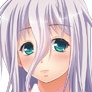

**46962_2014.jpg**


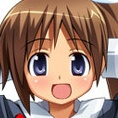

**34771_2011.jpg**


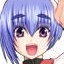

**22804_2008.jpg**


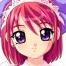

**2206_2001.jpg**


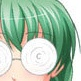

**29627_2010.jpg**


In [16]:
# Prepare images and prompt for the model
images_for_model = [img[0] for img in sampled_images]
image_names = [img[1] for img in sampled_images]

# Pass sampled images and the prompt to the model
response = model.generate_content(images_for_model + [prompt])

# Display the conversation with images
output_text = response.text

# Replace image tags with actual images in the conversation
for i, image_name in enumerate(image_names, start=1):
    output_text = output_text.replace(f"<img{i}>", f"![{image_name}](attachment:{image_name})")

# Display the output as Markdown
display(Markdown(output_text))

# Display the images inline
for img, img_name in sampled_images:
    display(img)
    print(f"**{img_name}**")

In [17]:
# Function to convert image to base64
def image_to_base64(image):
    buffer = BytesIO()
    image.save(buffer, format="PNG")
    return base64.b64encode(buffer.getvalue()).decode()


In [18]:
# # Function to save data to JSON
# def save_to_json_file(data, json_file="output.json"):
#     """
#     Save the conversation data to a JSON file, appending new runs.
#     :param data: The new conversation data to save.
#     :param json_file: The path to the JSON file.
#     """
#     # Load existing data if the file exists
#     if os.path.exists(json_file):
#         with open(json_file, "r") as file:
#             existing_data = json.load(file)
#     else:
#         existing_data = []

#     # Append the new data
#     existing_data.append(data)

#     # Save back to the JSON file
#     with open(json_file, "w") as file:
#         json.dump(existing_data, file, indent=4)


def save_to_json_file(data, json_file="output.json"):
    """
    Save the conversation data to a JSON file, appending new runs.
    :param data: The new conversation data to save.
    :param json_file: The path to the JSON file.
    """
    # Load existing data if the file exists
    if os.path.exists(json_file):
        with open(json_file, "r") as file:
            try:
                existing_data = json.load(file)
            except json.JSONDecodeError:  # Handle empty or corrupted files
                print(f"Warning: {json_file} is empty or corrupted. Initializing new file.")
                existing_data = []
    else:
        existing_data = []

    # Append the new data
    existing_data.append(data)

    # Save back to the JSON file
    with open(json_file, "w") as file:
        json.dump(existing_data, file, indent=4)


In [19]:
# Convert images to base64 for inline embedding
base64_images = [image_to_base64(img) for img in images_for_model]

# Generate the image tag-to-name mapping
image_tag_mapping = {f"<img_{i+1}>": name for i, name in enumerate(image_names)}

In [20]:
# Prepare JSON entry for the current run
# conversation_entry = {
#     "images": [{"name": name, "base64": b64} for name, b64 in zip(image_names, base64_images)],
#     "conversation": response.text,
# }

conversation_entry = {
    "images": [{"name": name, "base64": b64} for name, b64 in zip(image_names, base64_images)],
    "conversation": response.text,
    "image_tag_mapping": image_tag_mapping  # Add the image-to-tag mapping here
}


# Save to JSON file
save_to_json_file(conversation_entry, json_file="human_bot_conversation.json")

print("Conversation saved to human_bot_conversation.json.")

Conversation saved to human_bot_conversation.json.
